# Lab 1 Sample Code

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
    """ Sigmoid function.
    This function accepts any shape of np.ndarray object as input and perform sigmoid operation.
    """
    return 1 / (1 + np.exp(-x))


def der_sigmoid(y):
    """ First derivative of Sigmoid function.
    The input to this function should be the value that output from sigmoid function.
    """
    return y * (1 - y)


class GenData:
    @staticmethod
    def _gen_linear(n=100):
        """ Data generation (Linear)

        Args:
            n (int):    the number of data points generated in total.

        Returns:
            data (np.ndarray, np.float):    the generated data with shape (n, 2). Each row represents
                a data point in 2d space.
            labels (np.ndarray, np.int):    the labels that correspond to the data with shape (n, 1).
                Each row represents a corresponding label (0 or 1).
        """
        data = np.random.uniform(0, 1, (n, 2))

        inputs = []
        labels = []

        for point in data:
            inputs.append([point[0], point[1]])

            if point[0] > point[1]:
                labels.append(0)
            else:
                labels.append(1)

        return np.array(inputs), np.array(labels).reshape((-1, 1))

    @staticmethod
    def _gen_xor(n=100):
        """ Data generation (XOR)

        Args:
            n (int):    the number of data points generated in total.

        Returns:
            data (np.ndarray, np.float):    the generated data with shape (n, 2). Each row represents
                a data point in 2d space.
            labels (np.ndarray, np.int):    the labels that correspond to the data with shape (n, 1).
                Each row represents a corresponding label (0 or 1).
        """
        data_x = np.linspace(0, 1, n // 2)

        inputs = []
        labels = []

        for x in data_x:
            inputs.append([x, x])
            labels.append(0)

            if x == 1 - x:
                continue

            inputs.append([x, 1 - x])
            labels.append(1)

        return np.array(inputs), np.array(labels).reshape((-1, 1))

    @staticmethod
    def fetch_data(mode, n):
        """ Data gather interface

        Args:
            mode (str): 'Linear' or 'XOR', indicate which generator is used.
            n (int):    the number of data points generated in total.
        """
        assert mode == 'Linear' or mode == 'XOR'

        data_gen_func = {
            'Linear': GenData._gen_linear,
            'XOR': GenData._gen_xor
        }[mode]

        return data_gen_func(n)


class SimpleNet:
    def __init__(self, num_step=2000, print_interval=100):
        """ A hand-crafted implementation of simple network.

        Args:
            num_step (optional):    the total number of training steps.
            print_interval (optional):  the number of steps between each reported number.
        """
        self.num_step = num_step
        self.print_interval = print_interval

        # Model parameters initialization
        # hidden layer 1: 100 nodes
        # hidden layer 2: 10 nodes
        # Please initiate your network parameters here.
        # 初始化各項係數
        num_nn_input = 2
        num_nn_output = 1
        layer1_hidden_size = 100
        layer2_hidden_size = 10
        
        # 根據I/O和神經元個數對weight進行隨機取值
        self.w1 = np.random.randn(num_nn_input,layer1_hidden_size)
        self.w2 = np.random.randn(layer1_hidden_size,layer2_hidden_size)
        self.w3 = np.random.randn(layer2_hidden_size,num_nn_output)

    @staticmethod
    def plot_result(data, gt_y, pred_y):
        """ Data visualization with ground truth and predicted data comparison. There are two plots
        for them and each of them use different colors to differentiate the data with different labels.

        Args:
            data:   the input data
            gt_y:   ground truth to the data
            pred_y: predicted results to the data
        """
        assert data.shape[0] == gt_y.shape[0]
        assert data.shape[0] == pred_y.shape[0]

        plt.figure()

        plt.subplot(1, 2, 1)
        plt.title('Ground Truth', fontsize=18)

        for idx in range(data.shape[0]):
            if gt_y[idx] == 0:
                plt.plot(data[idx][0], data[idx][1], 'ro')
            else:
                plt.plot(data[idx][0], data[idx][1], 'bo')

        plt.subplot(1, 2, 2)
        plt.title('Prediction', fontsize=18)

        for idx in range(data.shape[0]):
            if pred_y[idx] == 0:
                plt.plot(data[idx][0], data[idx][1], 'ro')
            else:
                plt.plot(data[idx][0], data[idx][1], 'bo')

        plt.show()

    def forward(self, inputs):
        """ Implementation of the forward pass.
        It should accepts the inputs and passing them through the network and return results.
        """
        
        """ FILL IN HERE """
        # Forward為input經過weight傳過sigmold成為下一層的input，一層一層傳至最後一層輸出output
        self.first_forward_gradient = inputs 
        y1 = sigmoid(inputs @ self.w1)
        self.y1 = y1 

        self.second_forward_gradient = y1
        y2 = sigmoid(y1 @ self.w2)
        self.y2 = y2

        self.third_forward_gradient = y2 
        y3 = sigmoid(y2 @ self.w3)
        self.y3 = y3
        return y3.T

    def backward(self):
        """ Implementation of the backward pass.
        It should utilize the saved loss to compute gradients and update the network all the way to the front.
        """
        learning_rate = 1e-2

        """ FILL IN HERE """
        # Backward則為output透過sigmoid一次微分與權重轉置計算出error依序傳至前一層作為輸入
        self.third_backward_gradient = der_sigmoid(self.y3) * der_sigmoid(self.error)
        third_error = (self.third_backward_gradient @ self.w3.T)
        self.second_backward_gradient = der_sigmoid(self.y2) * third_error
        second_error = (self.second_backward_gradient @ self.w2.T)
        self.first_backward_gradient = der_sigmoid(self.y1) * second_error
        
    def gradient_calculate(self):
        # Total_Gradient為Forward+backward
        self.first_total_gradient = (self.first_forward_gradient.T @ self.first_backward_gradient)
        self.second_total_gradient = (self.second_forward_gradient.T @ self.second_backward_gradient)
        self.third_total_gradient = (self.third_forward_gradient.T @ self.third_backward_gradient)

    def weight_update(self, learning_rate):
        # 對權重進行更新
        self.w1 = (self.w1 - learning_rate * self.first_total_gradient)
        self.w2 = (self.w2 - learning_rate * self.second_total_gradient)
        self.w3 = (self.w3 - learning_rate * self.third_total_gradient)

    def train(self, inputs, labels):
        """ The training routine that runs and update the model.

        Args:
            inputs: the training (and testing) data used in the model.
            labels: the ground truth of correspond to input data.
        """
        # make sure that the amount of data and label is match
        assert inputs.shape[0] == labels.shape[0]

        n = inputs.shape[0]

        for epochs in range(self.num_step):
            for idx in range(n):
                # operation in each training step:
                #   1. forward passing
                #   2. compute loss
                #   3. propagate gradient backward to the front
                """ apply your backward function: """
                """ FILL IN HERE """
                self.output = self.forward(inputs[idx:idx+1, :])
                self.error = (self.output - labels[idx:idx+1, :])
                self.backward()
                self.gradient_calculate()
                self.weight_update(1e-2)


            if epochs % self.print_interval == 0:
                print('Epochs {}: '.format(epochs))
                self.test(inputs, labels)

        print('Training finished')
        self.test(inputs, labels)

    def test(self, inputs, labels):
        """ The testing routine that run forward pass and report the accuracy.

        Args:
            inputs: the testing data. One or several data samples are both okay.
                The shape is expected to be [BatchSize, 2].
            labels: the ground truth correspond to the inputs.
        """
        n = inputs.shape[0]

        error = 0.0
        mse = 0.0
        for idx in range(n):
            result = self.forward(inputs[idx:idx+1, :])
            error += abs(result - labels[idx:idx+1, :])
            mse  += (abs(result - labels[idx:idx+1, :])**2)
        error /= n
        mse  /= n
        
        print('accuracy: %.2f' % ((1 - error)*100) + '%')
        print('')
        print('loss: %.5f' % mse)
        print('')

### Run "Linear"

Epochs 0: 
accuracy: 50.12%

loss: 0.34837

Epochs 50: 
accuracy: 50.90%

loss: 0.38423

Epochs 100: 
accuracy: 51.17%

loss: 0.39162

Epochs 150: 
accuracy: 51.49%

loss: 0.38793

Epochs 200: 
accuracy: 52.00%

loss: 0.37296

Epochs 250: 
accuracy: 52.60%

loss: 0.35301

Epochs 300: 
accuracy: 53.36%

loss: 0.33122

Epochs 350: 
accuracy: 54.63%

loss: 0.29920

Epochs 400: 
accuracy: 57.01%

loss: 0.24995

Epochs 450: 
accuracy: 61.01%

loss: 0.19056

Epochs 500: 
accuracy: 66.03%

loss: 0.14052

Epochs 550: 
accuracy: 71.95%

loss: 0.10001

Epochs 600: 
accuracy: 76.94%

loss: 0.07592

Epochs 650: 
accuracy: 79.69%

loss: 0.06353

Epochs 700: 
accuracy: 81.66%

loss: 0.05539

Epochs 750: 
accuracy: 83.19%

loss: 0.04957

Epochs 800: 
accuracy: 84.43%

loss: 0.04513

Epochs 850: 
accuracy: 85.45%

loss: 0.04159

Epochs 900: 
accuracy: 86.32%

loss: 0.03867

Epochs 950: 
accuracy: 87.07%

loss: 0.03620

Training finished
accuracy: 87.70%

loss: 0.03413



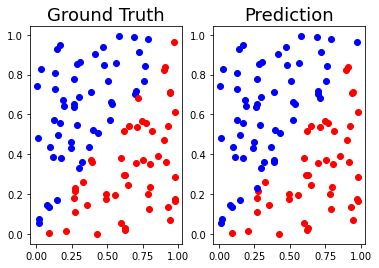

In [ ]:
if __name__ == '__main__':
    """ Customize your own code if needed """

    data, label = GenData.fetch_data('Linear', 100)

    net = SimpleNet(1000, 50)
    net.train(data, label)

    pred_result = np.round(net.forward(data))
    SimpleNet.plot_result(data, label, pred_result.T)

    """ FILL IN HERE """

### Run "XOR"

In [ ]:
if __name__ == '__main__':
    """ Customize your own code if needed """
    
    data, label = GenData.fetch_data('XOR', 100)

    net = SimpleNet(5000, 50)
    net.train(data, label)

    pred_result = np.round(net.forward(data))
    SimpleNet.plot_result(data, label, pred_result.T)

    """ FILL IN HERE """

Epochs 0: 
accuracy: 49.75%

loss: 0.41775

Epochs 50: 
accuracy: 49.85%

loss: 0.43392

Epochs 100: 
accuracy: 49.90%

loss: 0.44136

Epochs 150: 
accuracy: 49.93%

loss: 0.44580

Epochs 200: 
accuracy: 49.95%

loss: 0.44876

Epochs 250: 
accuracy: 49.97%

loss: 0.45086

Epochs 300: 
accuracy: 49.99%

loss: 0.45238

Epochs 350: 
accuracy: 50.01%

loss: 0.45348

Epochs 400: 
accuracy: 50.02%

loss: 0.45427

Epochs 450: 
accuracy: 50.03%

loss: 0.45478

Epochs 500: 
accuracy: 50.05%

loss: 0.45506

Epochs 550: 
accuracy: 50.06%

loss: 0.45510

Epochs 600: 
accuracy: 50.08%

loss: 0.45493

Epochs 650: 
accuracy: 50.09%

loss: 0.45450

Epochs 700: 
accuracy: 50.11%

loss: 0.45380

Epochs 750: 
accuracy: 50.14%

loss: 0.45274

Epochs 800: 
accuracy: 50.17%

loss: 0.45124

Epochs 850: 
accuracy: 50.20%

loss: 0.44911

Epochs 900: 
accuracy: 50.25%

loss: 0.44604

Epochs 950: 
accuracy: 50.32%

loss: 0.44141

Epochs 1000: 
accuracy: 50.43%

loss: 0.43391

Epochs 1050: 
accuracy: 50.66%

loss